<a href="https://colab.research.google.com/github/Jeevesh28/Song-Popularity-Predictor/blob/main/Open_IIT_Data_Analytics_2020_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing Libraries and Data:**

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("/content/drive/MyDrive/Data Analytics (Open IIT) 2020-21/openiit_train_data.csv")
train_df.head()

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
0,2015,0.949,0.235,0.0276,No,0.9270,5,0.513,-27.398,Major,01-01-1947,0.0381,110.838,0.0398,1947,3.0,very low
1,15901,0.855,0.456,0.4850,No,0.0884,4,0.151,-10.046,Major,13-11-2020,0.0437,152.066,0.8590,2020,2.4,low
2,9002,0.827,0.495,0.4990,No,0.0000,0,0.401,-8.009,Minor,01-01-1950,0.0474,108.004,0.7090,1950,2.6,very low
3,6734,0.654,0.643,0.4690,No,0.1080,7,0.218,-15.917,Major,30-04-1974,0.0368,83.636,0.9640,1974,2.4,low
4,15563,0.738,0.705,0.3110,No,0.0000,5,0.322,-12.344,Major,01-01-1973,0.0488,117.260,0.7850,1973,3.4,average


In [3]:
test_df = pd.read_csv("/content/drive/MyDrive/Data Analytics (Open IIT) 2020-21/openiit_test_data.csv")
test_df.head()

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min
0,4943,0.03360,0.523,0.861,No,0.000000,0,0.1440,-3.447,Major,01-01-2014,0.0644,127.049,0.346,2014,3.8
1,16165,0.76500,0.687,0.453,No,0.000008,7,0.0897,-11.649,Major,01-04-1972,0.0335,129.987,0.830,1972,3.8
2,6774,0.36300,0.536,0.640,No,0.000000,0,0.0948,-5.862,Major,02-06-1998,0.0368,142.483,0.289,1998,4.4
3,9959,0.00463,0.890,0.617,No,0.003850,2,0.0291,-12.096,Minor,08-09-1980,0.0418,121.126,0.970,1980,3.9
4,13818,0.00187,0.555,0.943,No,0.000042,2,0.1510,-2.492,Major,17-04-2007,0.0891,165.026,0.882,2007,3.2


### **EDA and Statistics Checking:**

In [4]:
print('Train data contains: ' + str(train_df.shape[0]) + ' rows and ' + str(train_df.shape[1]) + ' columns')
print('Column Names are:\n', train_df.columns)

Train data contains: 12227 rows and 17 columns
Column Names are:
 Index(['id', 'acousticness', 'danceability', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'release_date', 'speechiness', 'tempo', 'valence', 'year',
       'duration-min', 'popularity'],
      dtype='object')


In [5]:
train_df['popularity'].value_counts()

very low     3222
low          3118
average      2912
high         2606
very high     369
Name: popularity, dtype: int64

In [6]:
train_df.apply(lambda x : len(x.unique()))

id                  12227
acousticness         2714
danceability          898
energy               1396
explicit                2
instrumentalness     3658
key                    12
liveness             1477
loudness             8718
mode                    2
release_date         3859
speechiness          1275
tempo               11264
valence              1256
year                  102
duration-min          172
popularity              5
dtype: int64

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12227 entries, 0 to 12226
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                12227 non-null  int64  
 1   acousticness      12227 non-null  float64
 2   danceability      12227 non-null  float64
 3   energy            12227 non-null  float64
 4   explicit          12227 non-null  object 
 5   instrumentalness  12227 non-null  float64
 6   key               12227 non-null  int64  
 7   liveness          12227 non-null  float64
 8   loudness          12227 non-null  float64
 9   mode              12227 non-null  object 
 10  release_date      12227 non-null  object 
 11  speechiness       12227 non-null  float64
 12  tempo             12227 non-null  float64
 13  valence           12227 non-null  float64
 14  year              12227 non-null  int64  
 15  duration-min      12227 non-null  float64
 16  popularity        12227 non-null  object

In [8]:
train_df.drop('id', axis = 1, inplace = True)
test_df.drop('id', axis = 1, inplace = True)

In [9]:
train_df.describe()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,year,duration-min
count,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000
mean,0.430578,0.556353,0.522129,0.149321,5.205202,0.201365,-10.668687,0.097680,118.167495,0.525300,1984.517298,3.888133
std,0.366893,0.175373,0.262482,0.297954,3.526954,0.173987,5.506888,0.155895,30.200064,0.258205,25.911998,2.383133
min,0.000001,0.000000,0.000020,0.000000,0.000000,0.014700,-43.738000,0.000000,0.000000,0.000000,1920.000000,0.200000
25%,0.058950,0.438000,0.303000,0.000000,2.000000,0.096200,-13.656000,0.034700,95.050500,0.321000,1966.000000,2.900000
50%,0.354000,0.569000,0.534000,0.000115,5.000000,0.132000,-9.584000,0.045600,116.915000,0.532000,1987.000000,3.600000
75%,0.805000,0.685000,0.739000,0.055650,8.000000,0.252000,-6.571500,0.078900,136.108500,0.737000,2008.000000,4.400000
max,0.996000,0.980000,1.000000,1.000000,11.000000,0.997000,1.006000,0.968000,216.843000,1.000000,2021.000000,72.800000


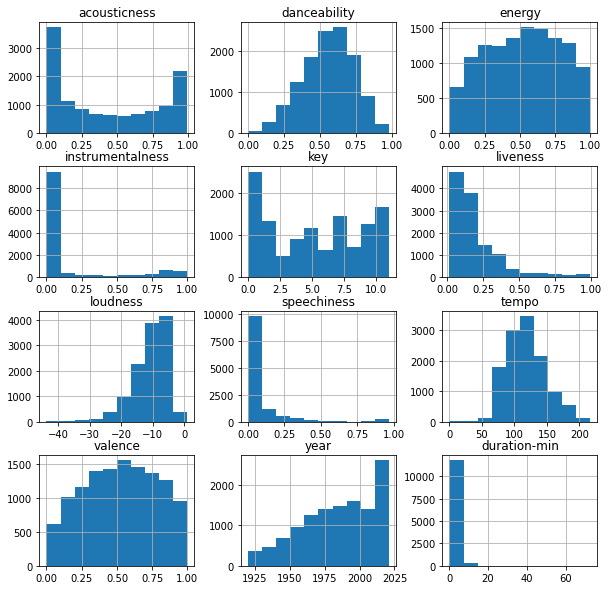

In [10]:
train_df.hist(figsize = (10,10));

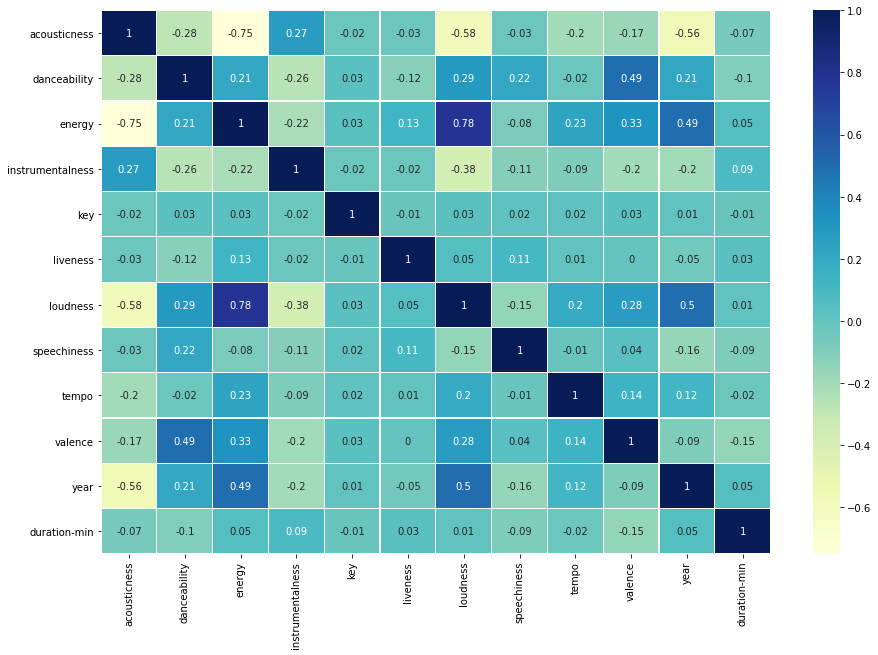

In [11]:
plt.figure(figsize=(15, 10))
sns.heatmap(train_df.corr().round(2), annot = True, linewidths=0.2, cmap = "YlGnBu");

In [12]:
stats = train_df.copy()

In [13]:
stats.drop(['release_date'], axis = 1, inplace = True)

In [14]:
from sklearn.preprocessing import LabelEncoder
stats['mode'] = LabelEncoder().fit_transform(stats['mode'])
stats['explicit'] = LabelEncoder().fit_transform(stats['explicit'])
stats['popularity'] = LabelEncoder().fit_transform(stats['popularity'])

In [15]:
stats = abs(stats)

In [16]:
stats.head()

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,duration-min,popularity
0,0.949,0.235,0.0276,0.0,0.9270,5.0,0.513,27.398,0.0,0.0381,110.838,0.0398,1947.0,3.0,4.0
1,0.855,0.456,0.4850,0.0,0.0884,4.0,0.151,10.046,0.0,0.0437,152.066,0.8590,2020.0,2.4,2.0
2,0.827,0.495,0.4990,0.0,0.0000,0.0,0.401,8.009,1.0,0.0474,108.004,0.7090,1950.0,2.6,4.0
3,0.654,0.643,0.4690,0.0,0.1080,7.0,0.218,15.917,0.0,0.0368,83.636,0.9640,1974.0,2.4,2.0
4,0.738,0.705,0.3110,0.0,0.0000,5.0,0.322,12.344,0.0,0.0488,117.260,0.7850,1973.0,3.4,0.0


In [17]:
X_data = stats.iloc[:, :-1]

In [18]:
Y_data = stats.iloc[:, -1]

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
data = train_df
X = X_data
y = Y_data  
bestfeatures = SelectKBest(score_func=chi2, k= 'all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(10,'Score'))  

               Specs        Score
7           loudness  5980.503233
12              year  1675.518511
3           explicit   979.745149
4   instrumentalness   805.665282
0       acousticness   717.234276
10             tempo   666.133891
2             energy   196.116615
9        speechiness   147.213313
13      duration-min    75.233076
8               mode    39.986979


In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
data = train_df
X = X_data 
y = Y_data   
bestfeatures = SelectKBest(score_func=f_classif, k= 'all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(10,'Score')) 

               Specs        Score
12              year  2080.300532
0       acousticness   705.813139
7           loudness   635.212415
2             energy   422.843907
4   instrumentalness   380.883475
3           explicit   301.585175
1       danceability   173.956579
9        speechiness   155.392881
6           liveness    35.511399
11           valence    22.753811


In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
data = train_df
X = X_data
y = Y_data   
bestfeatures = SelectKBest(score_func=mutual_info_classif, k= 'all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(10,'Score')) 

               Specs     Score
12              year  0.563831
0       acousticness  0.137062
7           loudness  0.115340
4   instrumentalness  0.087938
2             energy  0.081075
13      duration-min  0.072789
10             tempo  0.068400
9        speechiness  0.053183
1       danceability  0.037766
3           explicit  0.032554


[0.03116641 0.02962268 0.03700556 0.08252462 0.12498511 0.01167935
 0.03369593 0.03213377 0.01083734 0.02565999 0.02273731 0.02951304
 0.48735103 0.04108782]


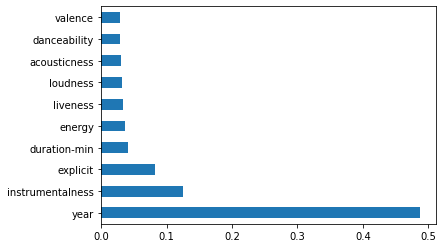

In [22]:
X = X_data 
y = Y_data    
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
model = XGBClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

[0.09245612 0.06248663 0.07217951 0.0101033  0.06239967 0.03617937
 0.06017999 0.08228524 0.00952812 0.06823558 0.05885625 0.06163711
 0.26384284 0.05963027]


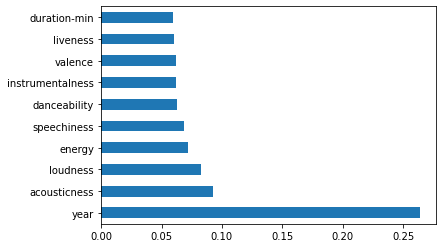

In [23]:
X = X_data  
y = Y_data    
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
model = RandomForestClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

[0.06 0.06 0.1  0.   0.02 0.   0.06 0.1  0.02 0.02 0.08 0.04 0.4  0.04]


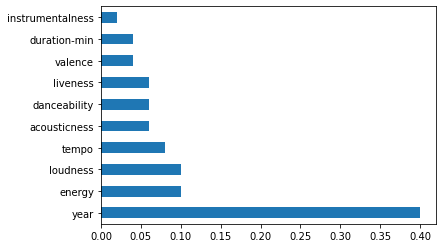

In [24]:
X = X_data
y = Y_data   
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
model = AdaBoostClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show();

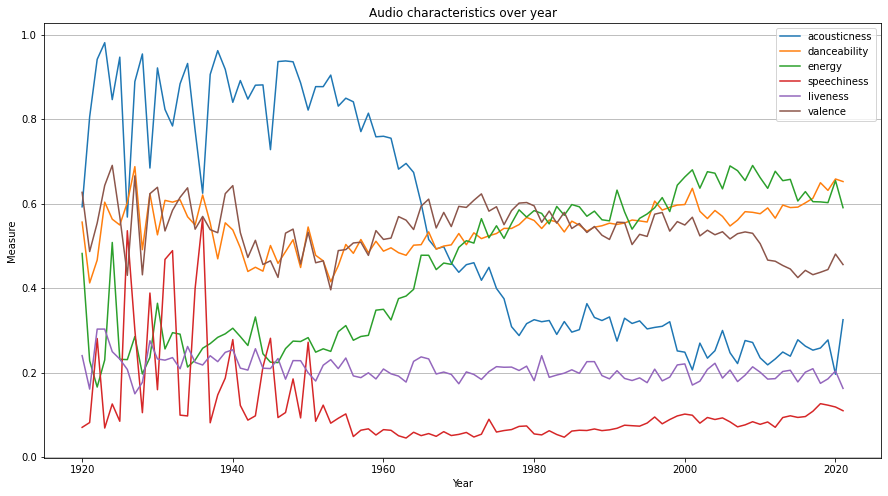

In [25]:
fig = plt.figure(figsize=(15, 8))
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = train_df.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over year')
ax.patch.set_alpha(0.3)
ax.set_ylabel('Measure')
ax.set_xlabel('Year')
ax.yaxis.grid(True)

### **Data Preparation:**

In [26]:
train_df['season'] = train_df['release_date'].str[3:5]
train_df['season'] = train_df['season'].replace('01', 0)
train_df['season'] = train_df['season'].replace('02', 0)
train_df['season'] = train_df['season'].replace('03', 1)
train_df['season'] = train_df['season'].replace('04', 1)
train_df['season'] = train_df['season'].replace('05', 1)
train_df['season'] = train_df['season'].replace('06', 2)
train_df['season'] = train_df['season'].replace('07', 2)
train_df['season'] = train_df['season'].replace('08', 2)
train_df['season'] = train_df['season'].replace('09', 3)
train_df['season'] = train_df['season'].replace('10', 3)
train_df['season'] = train_df['season'].replace('11', 3)
train_df['season'] = train_df['season'].replace('12', 0)

In [27]:
test_df['season'] = test_df['release_date'].str[3:5]
test_df['season'] = test_df['season'].replace('01', 0)
test_df['season'] = test_df['season'].replace('02', 0)
test_df['season'] = test_df['season'].replace('03', 1)
test_df['season'] = test_df['season'].replace('04', 1)
test_df['season'] = test_df['season'].replace('05', 1)
test_df['season'] = test_df['season'].replace('06', 2)
test_df['season'] = test_df['season'].replace('07', 2)
test_df['season'] = test_df['season'].replace('08', 2)
test_df['season'] = test_df['season'].replace('09', 3)
test_df['season'] = test_df['season'].replace('10', 3)
test_df['season'] = test_df['season'].replace('11', 3)
test_df['season'] = test_df['season'].replace('12', 0)

In [28]:
from datetime import date
import holidays

In [29]:
us_holidays = holidays.US()

In [30]:
for date, name in sorted(holidays.US().items()):
    print(date, name)

In [31]:
print('01-01-2018' in us_holidays)

True


In [32]:
print(us_holidays.get('02-01-2018'))

None


In [33]:
train_df['release_date'] = pd.to_datetime(train_df['release_date'])
test_df['release_date'] = pd.to_datetime(test_df['release_date'])

In [34]:
train_df['release_date'] = train_df['release_date'].dt.date.tolist()
test_df['release_date'] = test_df['release_date'].dt.date.tolist()

In [35]:
train_df['holiday_or_not'] = 0
test_df['holiday_or_not'] = 0

In [36]:
for i in range(len(train_df)):
  if (train_df['release_date'][i] in us_holidays) == True:
    train_df['holiday_or_not'][i] = 1

In [37]:
for i in range(len(test_df)):
  if (test_df['release_date'][i] in us_holidays) == True:
    test_df['holiday_or_not'][i] = 1

In [38]:
columns_drop = ['release_date']
train_df.drop(columns_drop, axis = 1, inplace = True)
train_df.head()

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,duration-min,popularity,season,holiday_or_not
0,0.949,0.235,0.0276,No,0.9270,5,0.513,-27.398,Major,0.0381,110.838,0.0398,1947,3.0,very low,0,1
1,0.855,0.456,0.4850,No,0.0884,4,0.151,-10.046,Major,0.0437,152.066,0.8590,2020,2.4,low,3,0
2,0.827,0.495,0.4990,No,0.0000,0,0.401,-8.009,Minor,0.0474,108.004,0.7090,1950,2.6,very low,0,1
3,0.654,0.643,0.4690,No,0.1080,7,0.218,-15.917,Major,0.0368,83.636,0.9640,1974,2.4,low,1,0
4,0.738,0.705,0.3110,No,0.0000,5,0.322,-12.344,Major,0.0488,117.260,0.7850,1973,3.4,average,0,1


In [39]:
columns_drop = ['release_date']
test_df.drop(columns_drop, axis = 1, inplace = True)
test_df.head()

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,duration-min,season,holiday_or_not
0,0.03360,0.523,0.861,No,0.000000,0,0.1440,-3.447,Major,0.0644,127.049,0.346,2014,3.8,0,1
1,0.76500,0.687,0.453,No,0.000008,7,0.0897,-11.649,Major,0.0335,129.987,0.830,1972,3.8,1,0
2,0.36300,0.536,0.640,No,0.000000,0,0.0948,-5.862,Major,0.0368,142.483,0.289,1998,4.4,2,0
3,0.00463,0.890,0.617,No,0.003850,2,0.0291,-12.096,Minor,0.0418,121.126,0.970,1980,3.9,3,0
4,0.00187,0.555,0.943,No,0.000042,2,0.1510,-2.492,Major,0.0891,165.026,0.882,2007,3.2,1,0


In [40]:
train_df['year'] = pd.qcut(train_df['year'], q=16)
train_df['duration-min'] = pd.qcut(train_df['duration-min'], q=4)

In [41]:
test_df['year'] = pd.qcut(test_df['year'], q=16)
test_df['duration-min'] = pd.qcut(test_df['duration-min'], q=4)

In [42]:
cat_col= ['explicit', 'mode']

In [43]:
from sklearn.preprocessing import LabelEncoder
train_df['year'] = LabelEncoder().fit_transform(train_df['year'])
train_df['duration-min'] = LabelEncoder().fit_transform(train_df['duration-min'])

In [44]:
from sklearn.preprocessing import LabelEncoder
test_df['year'] = LabelEncoder().fit_transform(test_df['year'])
test_df['duration-min'] = LabelEncoder().fit_transform(test_df['duration-min'])

In [45]:
replace_label = {'popularity':{'very low': 1, 'low': 2, 'average': 3, 'high':4, 'very high': 5}}
tarin_df = train_df.replace(replace_label)

In [46]:
train_df.head()

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,duration-min,popularity,season,holiday_or_not
0,0.949,0.235,0.0276,No,0.9270,5,0.513,-27.398,Major,0.0381,110.838,0.0398,1,1,very low,0,1
1,0.855,0.456,0.4850,No,0.0884,4,0.151,-10.046,Major,0.0437,152.066,0.8590,15,0,low,3,0
2,0.827,0.495,0.4990,No,0.0000,0,0.401,-8.009,Minor,0.0474,108.004,0.7090,1,0,very low,0,1
3,0.654,0.643,0.4690,No,0.1080,7,0.218,-15.917,Major,0.0368,83.636,0.9640,5,0,low,1,0
4,0.738,0.705,0.3110,No,0.0000,5,0.322,-12.344,Major,0.0488,117.260,0.7850,5,1,average,0,1


In [47]:
train_df = pd.get_dummies(data=train_df,columns=cat_col)

In [48]:
train_df.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,year,duration-min,popularity,season,holiday_or_not,explicit_No,explicit_Yes,mode_Major,mode_Minor
0,0.949,0.235,0.0276,0.9270,5,0.513,-27.398,0.0381,110.838,0.0398,1,1,very low,0,1,1,0,1,0
1,0.855,0.456,0.4850,0.0884,4,0.151,-10.046,0.0437,152.066,0.8590,15,0,low,3,0,1,0,1,0
2,0.827,0.495,0.4990,0.0000,0,0.401,-8.009,0.0474,108.004,0.7090,1,0,very low,0,1,1,0,0,1
3,0.654,0.643,0.4690,0.1080,7,0.218,-15.917,0.0368,83.636,0.9640,5,0,low,1,0,1,0,1,0
4,0.738,0.705,0.3110,0.0000,5,0.322,-12.344,0.0488,117.260,0.7850,5,1,average,0,1,1,0,1,0


In [49]:
test_df = pd.get_dummies(data=test_df,columns=cat_col)

In [50]:
test_df.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,year,duration-min,season,holiday_or_not,explicit_No,explicit_Yes,mode_Major,mode_Minor
0,0.03360,0.523,0.861,0.000000,0,0.1440,-3.447,0.0644,127.049,0.346,13,2,0,1,1,0,1,0
1,0.76500,0.687,0.453,0.000008,7,0.0897,-11.649,0.0335,129.987,0.830,5,2,1,0,1,0,1,0
2,0.36300,0.536,0.640,0.000000,0,0.0948,-5.862,0.0368,142.483,0.289,10,2,2,0,1,0,1,0
3,0.00463,0.890,0.617,0.003850,2,0.0291,-12.096,0.0418,121.126,0.970,6,2,3,0,1,0,0,1
4,0.00187,0.555,0.943,0.000042,2,0.1510,-2.492,0.0891,165.026,0.882,11,1,1,0,1,0,1,0


In [51]:
y = train_df.loc[:, 'popularity']
train_df.drop('popularity', inplace = True, axis = 1)

### **Final Dataframes:**

In [52]:
x = train_df.iloc[:, :]
x.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,year,duration-min,season,holiday_or_not,explicit_No,explicit_Yes,mode_Major,mode_Minor
0,0.949,0.235,0.0276,0.9270,5,0.513,-27.398,0.0381,110.838,0.0398,1,1,0,1,1,0,1,0
1,0.855,0.456,0.4850,0.0884,4,0.151,-10.046,0.0437,152.066,0.8590,15,0,3,0,1,0,1,0
2,0.827,0.495,0.4990,0.0000,0,0.401,-8.009,0.0474,108.004,0.7090,1,0,0,1,1,0,0,1
3,0.654,0.643,0.4690,0.1080,7,0.218,-15.917,0.0368,83.636,0.9640,5,0,1,0,1,0,1,0
4,0.738,0.705,0.3110,0.0000,5,0.322,-12.344,0.0488,117.260,0.7850,5,1,0,1,1,0,1,0


In [53]:
x_test = test_df.iloc[:, :]
x_test.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,year,duration-min,season,holiday_or_not,explicit_No,explicit_Yes,mode_Major,mode_Minor
0,0.03360,0.523,0.861,0.000000,0,0.1440,-3.447,0.0644,127.049,0.346,13,2,0,1,1,0,1,0
1,0.76500,0.687,0.453,0.000008,7,0.0897,-11.649,0.0335,129.987,0.830,5,2,1,0,1,0,1,0
2,0.36300,0.536,0.640,0.000000,0,0.0948,-5.862,0.0368,142.483,0.289,10,2,2,0,1,0,1,0
3,0.00463,0.890,0.617,0.003850,2,0.0291,-12.096,0.0418,121.126,0.970,6,2,3,0,1,0,0,1
4,0.00187,0.555,0.943,0.000042,2,0.1510,-2.492,0.0891,165.026,0.882,11,1,1,0,1,0,1,0


### **Model Testing:**

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.25)

In [55]:
from sklearn.preprocessing import StandardScaler
std_x = StandardScaler()
x_train_std = std_x.fit_transform(x_train)
x_test_std = std_x.transform(x_test)

In [56]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 

[0]K-Nearest Neighbors Performance:

Accuracy: 0.5024533856722276
Classification Report:               precision    recall  f1-score   support

     average       0.37      0.46      0.41       723
        high       0.49      0.53      0.51       678
         low       0.44      0.42      0.43       770
   very high       0.24      0.10      0.14        92
    very low       0.79      0.65      0.71       794

    accuracy                           0.50      3057
   macro avg       0.47      0.43      0.44      3057
weighted avg       0.52      0.50      0.51      3057



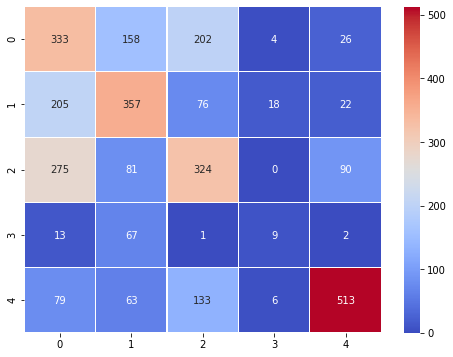

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_std, y_train)
knn_pred = knn.predict(x_test_std)
knn_accu = accuracy_score(y_test, knn_pred)
knn_report = classification_report(y_test, knn_pred)
knn_cm = confusion_matrix(y_test, knn_pred)
print('[0]K-Nearest Neighbors Performance:\n')
print('Accuracy:', knn_accu)
print('Classification Report:', knn_report)
plt.figure(figsize=(8,6))
sns.heatmap(knn_cm, annot = True, cmap='coolwarm', linewidths=0.2, fmt = "d");

[1]Decision Tree Classifier Performance:

Accuracy: 0.5116126921818777
Classification Report:               precision    recall  f1-score   support

     average       0.39      0.39      0.39       723
        high       0.45      0.45      0.45       678
         low       0.49      0.50      0.50       770
   very high       0.31      0.41      0.36        92
    very low       0.73      0.71      0.72       794

    accuracy                           0.51      3057
   macro avg       0.47      0.49      0.48      3057
weighted avg       0.51      0.51      0.51      3057



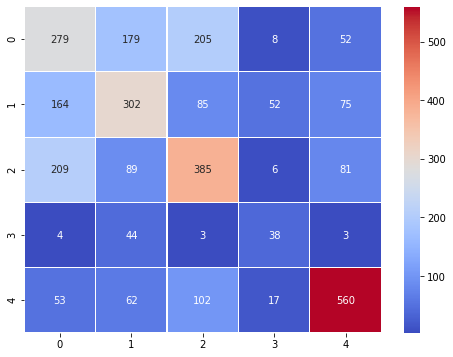

In [58]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier()
dt.fit(x_train_std, y_train)
dt_pred = dt.predict(x_test_std)
dt_accu = accuracy_score(y_test, dt_pred)
dt_report = classification_report(y_test, dt_pred)
dt_cm = confusion_matrix(y_test, dt_pred)
print('[1]Decision Tree Classifier Performance:\n')
print('Accuracy:', dt_accu)
print('Classification Report:', dt_report)
plt.figure(figsize=(8,6))
sns.heatmap(dt_cm, annot = True, cmap='coolwarm', linewidths=0.2, fmt = "d");

[2]SVM Classifier Performance:

Accuracy: 0.5116126921818777
Classification Report:               precision    recall  f1-score   support

     average       0.39      0.39      0.39       723
        high       0.45      0.45      0.45       678
         low       0.49      0.50      0.50       770
   very high       0.31      0.41      0.36        92
    very low       0.73      0.71      0.72       794

    accuracy                           0.51      3057
   macro avg       0.47      0.49      0.48      3057
weighted avg       0.51      0.51      0.51      3057



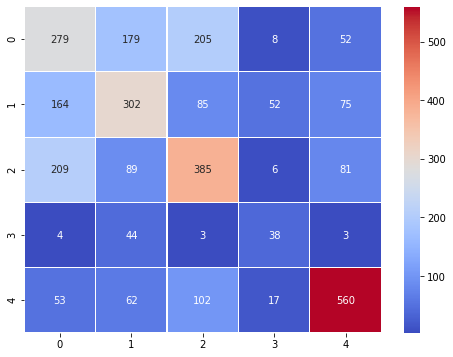

In [59]:
from sklearn.svm import SVC 
svc = SVC()
svc.fit(x_train_std, y_train)
svc_pred = dt.predict(x_test_std)
svc_accu = accuracy_score(y_test, svc_pred)
svc_report = classification_report(y_test, svc_pred)
svc_cm = confusion_matrix(y_test, svc_pred)
print('[2]SVM Classifier Performance:\n')
print('Accuracy:', svc_accu)
print('Classification Report:', svc_report)
plt.figure(figsize=(8,6))
sns.heatmap(svc_cm, annot = True, cmap='coolwarm', linewidths=0.2, fmt = "d");

[3]Gaussian Naive Bayes Classifier Performance:

Accuracy: 0.4870788354596009
Classification Report:               precision    recall  f1-score   support

     average       0.42      0.30      0.35       723
        high       0.46      0.32      0.38       678
         low       0.47      0.68      0.56       770
   very high       0.20      0.64      0.31        92
    very low       0.69      0.60      0.64       794

    accuracy                           0.49      3057
   macro avg       0.45      0.51      0.45      3057
weighted avg       0.51      0.49      0.48      3057



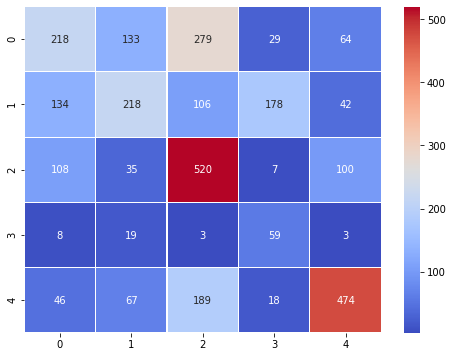

In [60]:
from sklearn.naive_bayes import GaussianNB 
gb = GaussianNB()
gb.fit(x_train_std, y_train)
gb_pred = gb.predict(x_test_std)
gb_accu = accuracy_score(y_test, gb_pred)
gb_report = classification_report(y_test, gb_pred)
gb_cm = confusion_matrix(y_test, gb_pred)
print('[3]Gaussian Naive Bayes Classifier Performance:\n')
print('Accuracy:', gb_accu)
print('Classification Report:', gb_report)
plt.figure(figsize=(8,6))
sns.heatmap(gb_cm, annot = True, cmap='coolwarm', linewidths=0.2, fmt = "d");

[4]Random Forest Classifier Performance:

Accuracy: 0.6241413150147204
Classification Report:               precision    recall  f1-score   support

     average       0.51      0.46      0.49       723
        high       0.61      0.57      0.59       678
         low       0.55      0.71      0.62       770
   very high       0.56      0.16      0.25        92
    very low       0.83      0.79      0.81       794

    accuracy                           0.62      3057
   macro avg       0.61      0.54      0.55      3057
weighted avg       0.63      0.62      0.62      3057



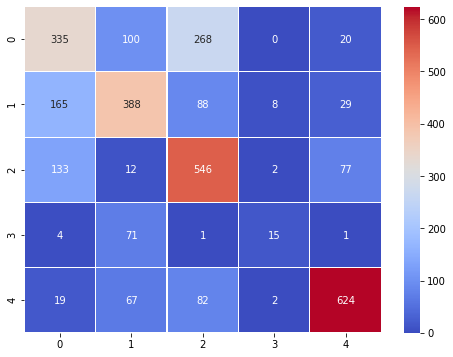

In [61]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(n_estimators= 900)
rf.fit(x_train_std, y_train)
rf_pred = rf.predict(x_test_std)
rf_accu = accuracy_score(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)
rf_cm = confusion_matrix(y_test, rf_pred)
print('[4]Random Forest Classifier Performance:\n')
print('Accuracy:', rf_accu)
print('Classification Report:', rf_report)
plt.figure(figsize=(8,6))
sns.heatmap(rf_cm, annot = True, cmap='coolwarm', linewidths=0.2, fmt = "d");

[5]xgBoost Classifier Performance:

Accuracy: 0.6149820085050703
Classification Report:               precision    recall  f1-score   support

     average       0.52      0.49      0.50       723
        high       0.62      0.52      0.57       678
         low       0.54      0.70      0.61       770
   very high       0.46      0.25      0.32        92
    very low       0.80      0.77      0.79       794

    accuracy                           0.61      3057
   macro avg       0.59      0.55      0.56      3057
weighted avg       0.62      0.61      0.61      3057



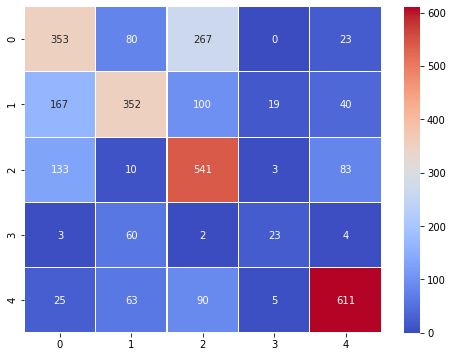

In [62]:
from xgboost import XGBClassifier
xg = XGBClassifier(learning_rate= 0.04, n_estimators=450)
xg.fit(x_train_std, y_train)
xg_pred = xg.predict(x_test_std)
xg_accu = accuracy_score(y_test, xg_pred)
xg_report = classification_report(y_test, xg_pred)
xg_cm = confusion_matrix(y_test, xg_pred)
print('[5]xgBoost Classifier Performance:\n')
print('Accuracy:', xg_accu)
print('Classification Report:', xg_report)
plt.figure(figsize=(8,6))
sns.heatmap(xg_cm, annot = True, cmap='coolwarm', linewidths=0.2, fmt = "d");

[6]AdaBoost Classifier Performance:

Accuracy: 0.5731108930323847
Classification Report:               precision    recall  f1-score   support

     average       0.46      0.41      0.43       723
        high       0.57      0.50      0.53       678
         low       0.51      0.62      0.56       770
   very high       0.28      0.29      0.28        92
    very low       0.78      0.77      0.78       794

    accuracy                           0.57      3057
   macro avg       0.52      0.52      0.52      3057
weighted avg       0.58      0.57      0.57      3057



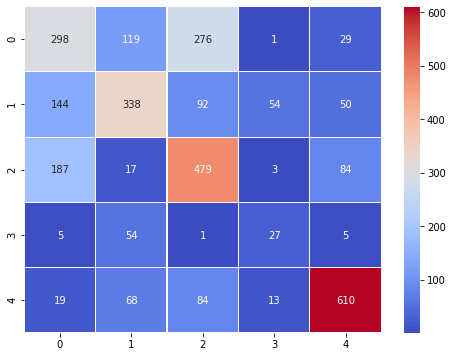

In [63]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(learning_rate= 0.4, n_estimators= 200)
ab.fit(x_train_std, y_train)
ab_pred = ab.predict(x_test_std)
ab_accu = accuracy_score(y_test, ab_pred)
ab_report = classification_report(y_test, ab_pred)
ab_cm = confusion_matrix(y_test, ab_pred)
print('[6]AdaBoost Classifier Performance:\n')
print('Accuracy:', ab_accu)
print('Classification Report:', ab_report)
plt.figure(figsize=(8,6))
sns.heatmap(ab_cm, annot = True, cmap='coolwarm', linewidths=0.2, fmt = "d");

[7]Gradient Boost Classifier Performance:

Accuracy: 0.6175989532221132
Classification Report:               precision    recall  f1-score   support

     average       0.52      0.49      0.50       723
        high       0.62      0.53      0.57       678
         low       0.55      0.70      0.61       770
   very high       0.36      0.22      0.27        92
    very low       0.81      0.78      0.79       794

    accuracy                           0.62      3057
   macro avg       0.57      0.54      0.55      3057
weighted avg       0.62      0.62      0.61      3057



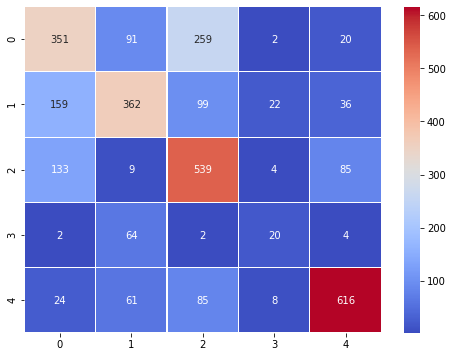

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train_std, y_train)
gbc_pred = gbc.predict(x_test_std)
gbc_accu = accuracy_score(y_test, gbc_pred)
gbc_report = classification_report(y_test, gbc_pred)
gbc_cm = confusion_matrix(y_test, gbc_pred)
print('[7]Gradient Boost Classifier Performance:\n')
print('Accuracy:', gbc_accu)
print('Classification Report:', gbc_report)
plt.figure(figsize=(8,6))
sns.heatmap(gbc_cm, annot = True, cmap='coolwarm', linewidths=0.2, fmt = "d");

### **Stacked Model and Result Preparation:**

In [65]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier()
rf.fit(x_train_std, y_train)
rf_pred = rf.predict(x_test_std)

In [66]:
from xgboost import XGBClassifier
xg = XGBClassifier(learning_rate= 0.04, n_estimators=450)
xg.fit(x_train_std, y_train)
xg_pred = xg.predict(x_test_std)

In [67]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(learning_rate= 0.4, n_estimators= 200)
ab.fit(x_train_std, y_train)
ab_pred = ab.predict(x_test_std)

In [68]:
x1 = []

for i in range(len(rf_pred)):

  if(rf_pred[i] == 'very low'):
    x1.append(1)

  if(rf_pred[i] == 'low'):
    x1.append(2)

  if(rf_pred[i] == 'average'):
    x1.append(3)

  if(rf_pred[i] == 'high'):
    x1.append(4)

  if(rf_pred[i] == 'very high'):
    x1.append(5)

In [69]:
x2 = []

for i in range(len(xg_pred)):

  if(xg_pred[i] == 'very low'):
    x2.append(1)

  if(xg_pred[i] == 'low'):
    x2.append(2)

  if(xg_pred[i] == 'average'):
    x2.append(3)

  if(xg_pred[i] == 'high'):
    x2.append(4)

  if(xg_pred[i] == 'very high'):
    x2.append(5)

In [70]:
x3 = []

for i in range(len(ab_pred)):

  if(ab_pred[i] == 'very low'):
    x3.append(1)

  if(ab_pred[i] == 'low'):
    x3.append(2)

  if(ab_pred[i] == 'average'):
    x3.append(3)

  if(ab_pred[i] == 'high'):
    x3.append(4)

  if(ab_pred[i] == 'very high'):
    x3.append(5)

In [71]:
x = []

for i in range(len(x_test_std)):
  x.append(np.ceil(((x1[i] + x2[i] + x3[i]) / 3 )))

In [72]:
pop = []
for i in x:
  if i == 1:
    pop.append('very low')
  if i == 2:
    pop.append('low')
  if i == 3:
    pop.append('average')
  if i == 4:
    pop.append('high')
  if i == 5:
    pop.append('very high')

In [73]:
y_test = y_test.values

### **Final Result:**

In [74]:
r = 0
b = 0


for i in range(len(x_test)):
  if(y_test[i] == 'very low'):
    y = 1

  if(y_test[i] == 'low'):
    y = 2

  if(y_test[i] == 'average'):
    y = 3

  if(y_test[i] == 'high'):
    y = 4

  if(y_test[i] == 'very high'):
    y = 5
  
  if(x[i] >= y):
    b += x[i]
    r += 2 * y

print('Revenue Earned:', r)
print('Amount Bid:', b)
print('Maximum amount that we can bid:', len(y_test) * 2.5)

Revenue Earned: 11136
Amount Bid: 6469.0
Maximum amount that we can bid: 7642.5


### **GridSearch to Optimise Parameters:**

In [75]:
param_xg = {'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 6, 7],
              'min_child_weight': [4, 5, 6],
              'subsample': [0.7, 0.8, 0.9],
              'colsample_bytree': [0.7, 0.8, 0.9],}

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xg = XGBClassifier()
xg_gs= GridSearchCV(xg, param_xg)
xg_gs.fit(x_train_std, y_train)
xg_gs_pred = xg_gs.predict(x_test_std)
xg_gs_accu = accuracy_score(y_test, xg_gs_pred)
xg_gs_report = classification_report(y_test, xg_gs_pred)
xg_gs_cm = confusion_matrix(y_test, xg_gs_pred)
print('xgBoost Classifier Performance:\n')
print('Accuracy:', xg_gs_accu)
print('Classification Report:', xg_gs_report)
plt.figure(figsize=(8,6))
sns.heatmap(xg_gs_cm, annot = True, cmap='coolwarm', linewidths=0.2, fmt = "d");

In [ ]:
xg_gs.best_params_